In [1]:
단어의 표현 방법
#1) local representation  :출현 빈도에 따라 인덱스 부여 -> 분류 문제나 유사도 
#2) continuous representation :주변단어를 참고하여 인덱스 부여

#TF-IDF : 불용어 또는 중요한 단어에 가중치를 줌. 
#--------Term Frequency-Inverse Document Frequency
#--------Tf(d,t) 문서(d) 안에 단어(t)가 나온 개수 
#--------Df(t) 단어(t)가 나온 문서(d)의 개수
#--------IDf(d,t) = ln(n/(1+Df)) : Df의 역수, n은 문서의 개수 
#--------결국, Tf*IDf 값이 낮으면 중요도 낮음(불용어), 값이 높으면 중요도 높음(특정 단어).

SyntaxError: invalid syntax (<ipython-input-1-775705f73c5c>, line 1)

In [2]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
import nltk  
nltk.download('punkt')
from nltk.tokenize import word_tokenize  
import re

#import nltk 안되면 
#pip uninstall nltk
#pip install -U nltk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#크롤링한 엑셀 파일 불러오기
import xlrd

loc=(r"C:\Users\Public\lstm.ipynb\xy.xlsx")

wb=xlrd.open_workbook(loc)
sheet1=wb.sheet_by_index(0)
sheet2=wb.sheet_by_index(1)

#표기가 다른 단어들의 통합 ex) US=USA
#대소문자 통합 : 문장 첫 단어만 소문자로 바꾸기 
#불용어, 등장 빈도가 적은 단어, 이모티콘 지우기

#불용어 제거를 위한 모듈
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

#이모티콘 제거를 위한 모듈
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F937\u200D\u2642\uFE0F"
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
#comment_list = []
#for i in range(len(comment_data)):
#    comment_list.append(comment_data['comment'].iloc[i])



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
x_comments=[]

#row i and column 1 -> 댓글들만 가져오기 
for i in range(sheet1.nrows):
    line=sheet1.cell_value(i,1)
    line=str(line)
    line=line.lower()
    #don't erase [?,:,"]
    line=re.sub('[-=+,#/\^$.@*\※~&%ㆍ!’』\\‘|\(\)\[\]\<\>`“\'…》;]','',line)
    line=re.sub(emoji_pattern,'',line)
    line2=tokenizer.tokenize(line) 
    x_comments.append(line2)
    
print(x_comments)


ople', 'it', 'works', 'oh', 'and', 'its', 'funny', 'too', 'i', 'guess'], ['you', 'are', 'almost', 'right', 'about', 'the', 'name', 'there', 'was', 'a', 'movie', 'made', 'during', 'the', '1920s', 'in', 'germany', 'called', '``', 'spione', "''", 'which', 'means', '``', 'spies', "''", 'in', 'english', 'so', 'yes', 'close', 'but', 'not', 'the', 'same'], ['my', 'favorite', 'spy', 'game', 'is', 'spy', 'vs', 'spy', 'for', 'the', 'gba'], ['i', 'thought', 'it', 'just', 'went', 'without', 'saying', 'that', 'his', 'rating', 'system', 'was', 'a', 'bit', 'of', 'a', 'farce', 'on', 'traditional', 'rating', 'systems'], ['definitely', 'didnt', 'expect', 'the', 'rant', 'at', 'the', 'end', 'as', 'soon', 'as', 'you', 'gave', 'the', 'movie', 'like', 'three', 'different', 'ratings', 'i', 'saw', 'there', 'was', 'still', 'a', 'lot', 'of', 'time', 'left', 'and', 'i', 'was', 'like', '``', 'what', 'more', 'could', 'he', 'say', "''", 'then', 'you', 'ranted', 'but', 'i', 'completely', 'ratings', 'are', 'like', 'hi

In [5]:
y_comments=[]

#row i and column 1 -> 댓글들만 가져오기 
for i in range(sheet2.nrows):
    line=sheet2.cell_value(i,1)
    line=str(line)
    line=line.lower()
    line=re.sub('[-=+,#/\^$.@*\※~&%ㆍ!’』\\‘|\(\)\[\]\<\>`“\'…》;]','',line)
    line=re.sub(emoji_pattern,'',line)
    line2=tokenizer.tokenize(line) 
    y_comments.append(line2)
    
print(y_comments)

s', 'i', 'feel', 'so', 'many', 'people', 'are', 'just', 'giving', 'a', 'negative', 'review', 'for', 'the', 'hell', 'of', 'it', 'without', 'any', 'valid', 'points', 'keep', 'it', 'up'], ['excellent', 'critic', 'thank', 'you'], ['love', 'that', 'shirt'], ['we', 'appreciate', 'your', 'content'], ['yes', 'i', 'actually', 'enjoyed', 'the', 'movie', 'bc', 'i', 'watched', 'it', 'as', 'if', 'it', 'was', 'a', 'play', 'he', 'is', 'right', 'the', 'whole', 'movie', 'feels', 'like', 'a', 'play', 'if', 'this', 'was', 'a', 'broadway', 'show', 'it', 'actually', 'wouldve', 'gotten', 'good', 'reviews'], ['youre', 'welcome'], ['i', 'all', 'ways', 'come', 'here', 'when', 'a', 'movie', 'peeks', 'interest', 'but', 'sadly', 'for', 'me', 'that', 'has', 'been', 'few', 'and', 'far', 'between', 'these', 'days', 'sigh'], ['everytime', 'i', 'think', 'of', 'simba', '?', 'i', 'think', 'jonathan', 'taylor', 'thomas', 'i', 'had', 'the', 'biggest', 'girl', 'crush', 'on', 'him', 'back', 'in', 'the', 'day'], ['you', 'dis

In [6]:
# 어간추출(stemming) - 품사의 정보가 보존되지 않음.  
# vs 표제어 추출(lemmatization) - 품사의 정보가 보존됨.
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
n=WordNetLemmatizer()

x1_data=[]
y1_data=[]

for l in x_comments:
    result=[]
    for w in l:
        #표제어 추출
        n.lemmatize(w) 
        result.append(w)
        #불용어 제거
        #if w not in stop_words:
        #   result.append(w)
            
    x1_data.append(result)

for l in y_comments:
    result=[]
    for w in l:
        #표제어 추출
        n.lemmatize(w) 
        result.append(w)
        #불용어 제거
        #if w not in stop_words:
        #   result.append(w)
            
    y1_data.append(result) 
    

   

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
print(x1_data)


ople', 'it', 'works', 'oh', 'and', 'its', 'funny', 'too', 'i', 'guess'], ['you', 'are', 'almost', 'right', 'about', 'the', 'name', 'there', 'was', 'a', 'movie', 'made', 'during', 'the', '1920s', 'in', 'germany', 'called', '``', 'spione', "''", 'which', 'means', '``', 'spies', "''", 'in', 'english', 'so', 'yes', 'close', 'but', 'not', 'the', 'same'], ['my', 'favorite', 'spy', 'game', 'is', 'spy', 'vs', 'spy', 'for', 'the', 'gba'], ['i', 'thought', 'it', 'just', 'went', 'without', 'saying', 'that', 'his', 'rating', 'system', 'was', 'a', 'bit', 'of', 'a', 'farce', 'on', 'traditional', 'rating', 'systems'], ['definitely', 'didnt', 'expect', 'the', 'rant', 'at', 'the', 'end', 'as', 'soon', 'as', 'you', 'gave', 'the', 'movie', 'like', 'three', 'different', 'ratings', 'i', 'saw', 'there', 'was', 'still', 'a', 'lot', 'of', 'time', 'left', 'and', 'i', 'was', 'like', '``', 'what', 'more', 'could', 'he', 'say', "''", 'then', 'you', 'ranted', 'but', 'i', 'completely', 'ratings', 'are', 'like', 'hi

In [8]:
print(y1_data)

s', 'i', 'feel', 'so', 'many', 'people', 'are', 'just', 'giving', 'a', 'negative', 'review', 'for', 'the', 'hell', 'of', 'it', 'without', 'any', 'valid', 'points', 'keep', 'it', 'up'], ['excellent', 'critic', 'thank', 'you'], ['love', 'that', 'shirt'], ['we', 'appreciate', 'your', 'content'], ['yes', 'i', 'actually', 'enjoyed', 'the', 'movie', 'bc', 'i', 'watched', 'it', 'as', 'if', 'it', 'was', 'a', 'play', 'he', 'is', 'right', 'the', 'whole', 'movie', 'feels', 'like', 'a', 'play', 'if', 'this', 'was', 'a', 'broadway', 'show', 'it', 'actually', 'wouldve', 'gotten', 'good', 'reviews'], ['youre', 'welcome'], ['i', 'all', 'ways', 'come', 'here', 'when', 'a', 'movie', 'peeks', 'interest', 'but', 'sadly', 'for', 'me', 'that', 'has', 'been', 'few', 'and', 'far', 'between', 'these', 'days', 'sigh'], ['everytime', 'i', 'think', 'of', 'simba', '?', 'i', 'think', 'jonathan', 'taylor', 'thomas', 'i', 'had', 'the', 'biggest', 'girl', 'crush', 'on', 'him', 'back', 'in', 'the', 'day'], ['you', 'dis

In [9]:
x2_data=[]
y2_data=[]

for i in range(len(x1_data)):
    line_f=' '.join(x1_data[i])
    x2_data.append(line_f)

for i in range(len(y1_data)):
    line_f=' '.join(y1_data[i])
    y2_data.append(line_f)    

In [10]:
#x2_data: train comments
#y2_data: test comments


In [11]:
print(x2_data)

ot normally a genre i like to watch because it scares me to much but with the good ones i will put myself through that fear to experience a story that gets me thinking', 'the music from the opening credits reminded me of akira', 'so i guess we now can confirm that hypnosis didnt work for link', 'stares at mythical crew in pepperjackian _', 'rhett : and in my loins even', "rhett : `` ill still give it a three ''", 'come lay yourself on me and then put me in your mouth rhett', 'the mythical society are confirmed elitists who live in a bubble', 'rhett : and in my loins', 'lay yourself on me and then put me in your mouth ”', 'whoever cut these burgers unevenly clearly had a sibling they had to share everything with when they were younger', 'when you have to make 12 burgers for 2 guys', 'look at that cross section', "daddy been at tha club ageeeeeen realises what he just said `` oh no ''", "link talking about mozzarella : `` its just here to make everyone else happy ''", 'link : we have twe

In [12]:
print(y2_data)

 your sir are awesometacular', 'that ending was awesome', 'you have convinced me to see the movie', "so happy you added the `` rant '' at the end those comments were pissing me off too keep up the good work jeremy", 'nice rant i like your rating system', 'lmao jeremy you are killing me dude', 'damn jeremy got angry lol veins popping youre awesome man', 'hey jeremy awesome review and props for calling out the rating system always found it kinda right not to compare movies that have totally different perspectives and audiences', 'ok i have to admit i did not think this movie would get good reviews thanks for the heads up jeremy', 'a fine video mr jahns', 'i was going to watch spy anyway just coz thats how i roll but this has got me looking forward to it way more than i was before', 'i enjoy jeremys thoughts on videos sometimes i dont always agree with them but its just one mans view', 'jeremyjahns is the reason why i choose to watch film reviews enough said', 'a decent review for a decen

In [13]:
#label 불러오기 

l_train=[]
l_test=[]

for i in range(sheet1.nrows):
    label=sheet1.cell_value(i,0)
    l_train.append(label)
for i in range(sheet2.nrows):
    label=sheet2.cell_value(i,0)
    l_test.append(label)
print(len(l_train))
Y_train=l_train+l_test
print(len(Y_train))
print(len(l_test))


3080
3609
529


In [14]:
#l_train: train label
#l_test: test label

In [15]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

max_words=5000
num_classes=5

Using TensorFlow backend.


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, LSTM, Embedding,SpatialDropout1D
from keras.preprocessing import sequence
from keras.utils import np_utils

In [17]:
tokenizer = Tokenizer(num_words=5000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(x_comments+y_comments)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))



Found 6182 unique tokens.


In [18]:

tokenizer = Tokenizer(num_words=5000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(y_comments)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 1929 unique tokens.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 100)          500000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 505       
Total params: 580,905
Trainable params: 580,905
Non-trainable params: 0
_________________________________________________________________
None


In [19]:

#train set does not contain test set.

In [20]:
#Vectorize comments, by turning each text into either a sequence of integers or into a vector. 
#Limit the data set to the top 5,0000 words.
#Set the max number of words in each complaint at 250.
X_train = tokenizer.texts_to_sequences(x_comments+y_comments)
X_test = tokenizer.texts_to_sequences(y_comments)
#Set the max number of words in each complaint at 250.
X_train = pad_sequences(X_train, maxlen=250)
X_test = pad_sequences(X_test,maxlen=250)
print('Shape of data tensor:', X_train.shape)

Shape of data tensor: (3080, 250)


In [21]:
import numpy as np
l2_train = np_utils.to_categorical(l_train+l_test) # 훈련용 레이블의 원-핫 인코딩
l2_test = np_utils.to_categorical(l_test) 


In [25]:
#shuffle the data and lable
np.random.seed(200)
np.random.shuffle(X_train) 
np.random.seed(200)
np.random.shuffle(l2_train)
 
np.random.seed(200)
np.random.shuffle(X_test) 
np.random.seed(200)
np.random.shuffle(l2_test)


In [26]:
model = Sequential()
model.add(Embedding(5000, 100, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 100)          500000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 505       
Total params: 580,905
Trainable params: 580,905
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
history = model.fit(X_train, l2_train, epochs=50, batch_size=64,validation_split=0.1,shuffle=True)

NameError: name 'epochs' is not defined

In [79]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, l2_test)[1]))

529/529 [==============================] - 2s 5ms/step

 테스트 정확도: 0.9206


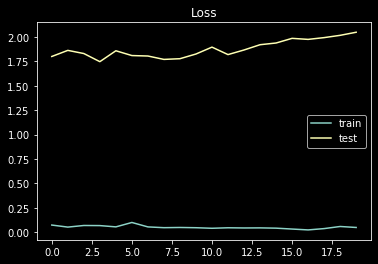

In [81]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

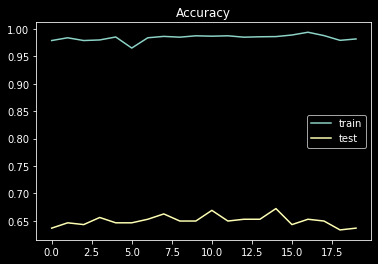

In [82]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [ ]:
### dataset size is too small, and noise of dataset result in overfitting 